In [9]:
import zipfile                                     
import pandas as pd                                
import matplotlib.pyplot as plt                    
import seaborn as sns                              
from sklearn.cluster import KMeans                 
from sklearn.model_selection import GridSearchCV   
from sklearn.metrics import silhouette_score       
from sklearn.preprocessing import StandardScaler  
%matplotlib inline

In [10]:
zipfile.ZipFile('data.zip').extractall('.')

df = pd.read_csv('data/iris.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
y = df.species

X = df.drop('species', axis = 1)

X = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [12]:
km = KMeans(n_clusters = 3, random_state = 1, init = 'k-means++', n_init = 10)

km.fit(X)

km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

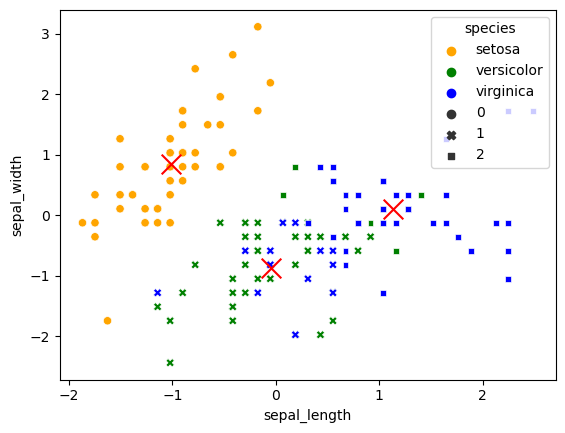

In [13]:
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = X, hue = y, style = km.labels_, palette = ["orange", "green", "blue"])

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker = 'x', s = 200, c = 'red')